In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.units as u
from astropy.table import Table
from mpdaf.obj import Cube
from mpdaf.obj import deg2sexa
import pandas as pd
import pyneb as pn
from astropy import visualization as viz
from astropy.visualization.mpl_normalize import ImageNormalize
import matplotlib.patches as patches
from scipy.interpolate import interp1d
from IPython.core.display import display, HTML
from astropy import visualization as viz
from astropy.visualization.mpl_normalize import ImageNormalize
import matplotlib.colors as colors
import matplotlib.colors as mcolors
import pickle
from Packages.plot_lines import PlotLines

/tmp/ipykernel_1513212/2756154415.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Collect stored data

In [8]:
# stack intensities 

intensity_map_0 = pickle.load(open('Stored_data/intensity_map_0.pkl', 'rb'))
intensity_map_1 = pickle.load(open('Stored_data/intensity_map_1.pkl', 'rb'))
intensity_map = np.ma.vstack((intensity_map_0, intensity_map_1)) #stack two arrays; intensity_map has legth 10 with the flux of all important lines 

pickle.dump(intensity_map, open('Stored_data/intensity_map.pkl', 'wb'))

In [9]:
# load intensities
c_Hb = pickle.load(open('Stored_data/c_Hb.pkl', 'rb'))
cube_cor = pickle.load(open('Stored_data/cube_cor.pkl', 'rb'))
intensity_map = pickle.load(open('Stored_data/intensity_map.pkl', 'rb'))


# Dust extinction map

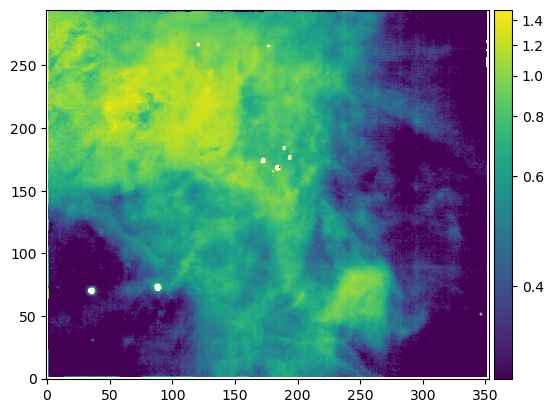

In [5]:
stretch = viz.AsinhStretch
norm = ImageNormalize(vmin = 0.3, vmax = 1.5,stretch=stretch(), clip=False)


plt.imshow(c_Hb, cmap='viridis', norm = norm)  # 'viridis' is just one of the available colormaps
plt.colorbar(pad=0.01, fraction=0.05)  # Add a colorbar to the plot for reference
#plt.title('Extinction correction')
plt.gca().invert_yaxis()

# Spectrum before and after reddening correction 

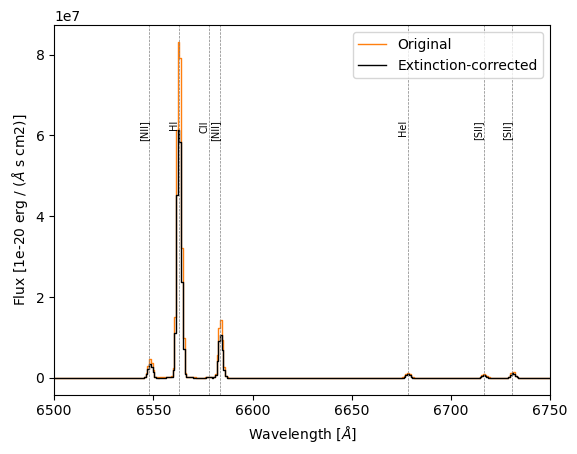

In [6]:
#observed cube (uncorrected fluxes)
cube_obs = Cube('../MUSE_data/muse-hr-fullcube-rebin05x05.fits')

d=5
for i in range(100,101):        #chose entire range (0,295) once I have access to server
    for j in range(201,202):    #chose entire range (0,353)
        sp = cube_obs[:, i, j]      #entire wavelength spectrum for pixel (i,j)
        flux = sp.data          #observed flux
        lam = sp.wave.coord()   #wavelength
    
        # Plotting
        plt.figure()
        sp.plot(label = 'Original', color = 'C1')
        sp.data = cube_cor[:,i,j] #update dfluxes with intensities
    
        sp.plot(label = 'Extinction-corrected', color = 'black')
        PlotLines.plot_all_lines(6500, 6750, np.max(sp.data)*1)
        #plt.plot(lam, flux, color = 'C0', label='Original')
        #plt.plot(lam, intensity, label = 'Extinction-corrected', color = 'black')
        plt.xlabel('Wavelength [$\AA$]')
        plt.ylabel('Flux [1e-20 erg / ($\AA$ s cm2)]')
        plt.xlim(6500, 6750)
        plt.legend(loc=1)

In [40]:
print(np.ma.mean(intensity_map[1]))

26568599.61895627


# Intensity maps of all lines 

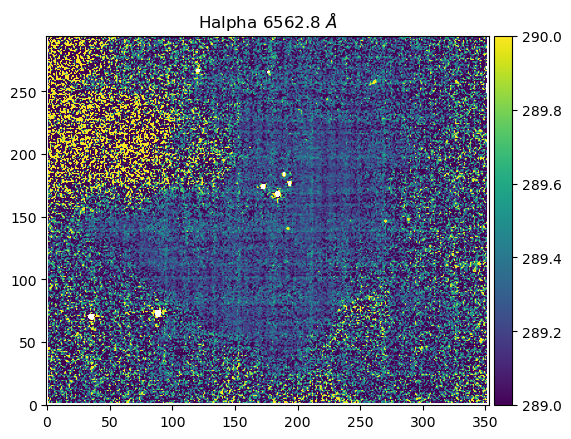

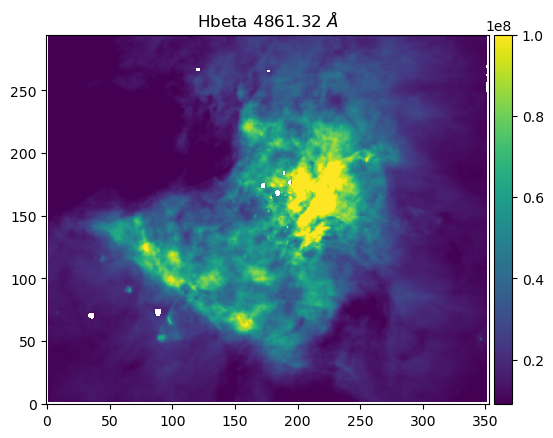

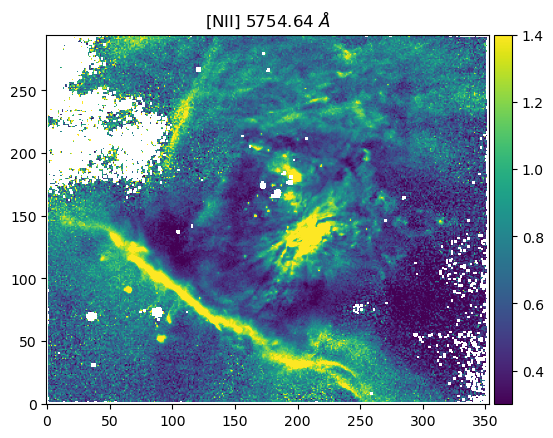

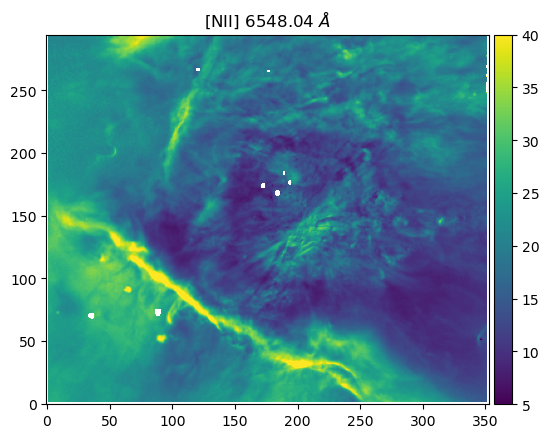

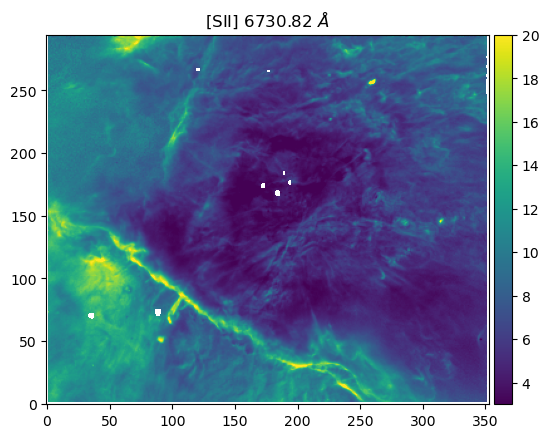

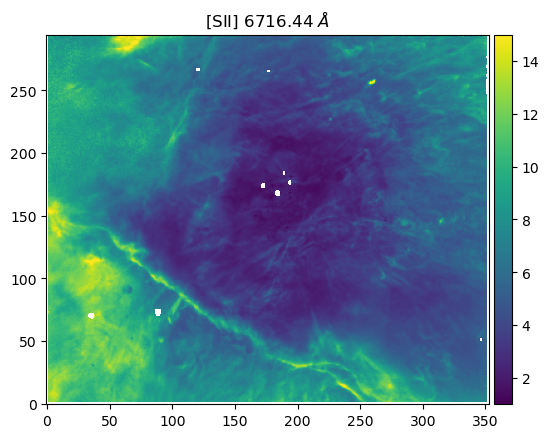

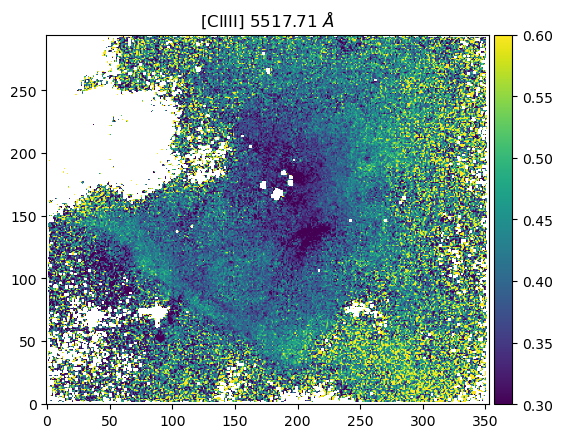

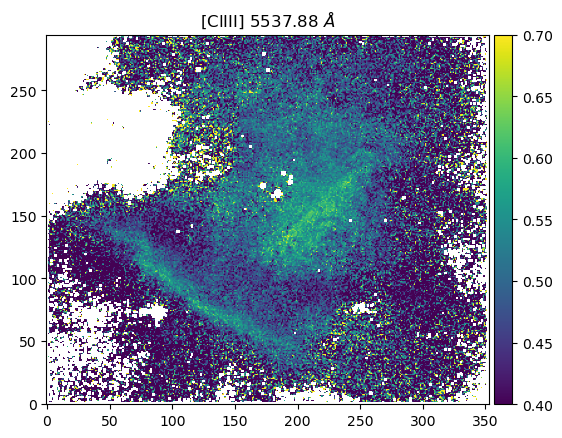

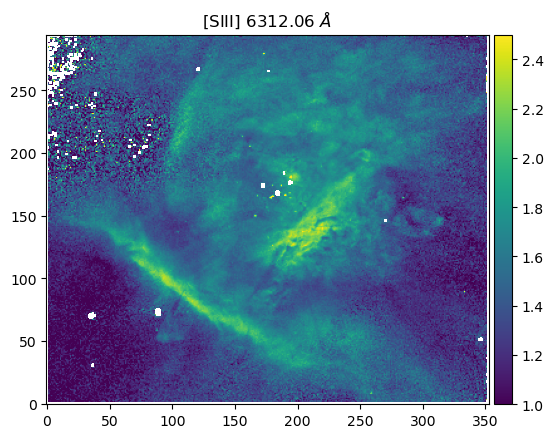

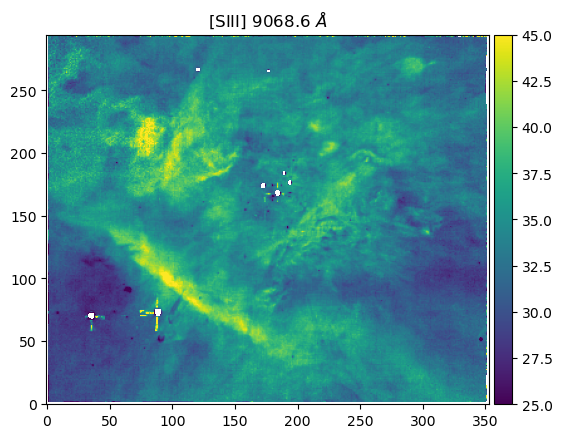

In [89]:
#important diagnostic lines; include also H_alpha and H_beta
label     = ['Halpha',    'Hbeta',    '[NII]',     '[NII]',    '[SII]',     '[SII]',      '[ClIII]',    '[ClIII]',   '[SIII]',   '[SIII]']   
line_list = [ 6562.8,      4861.32,    5754.64,     6548.04,    6730.82,     6716.44,      5517.71,       5537.88,    6312.06,    9068.60]  
                                                                                    
vmin_list = [ 289,          9e6,        0.3,          5,         3,            1,          0.3,             0.4,           1,         25]     
vmax_list = [ 290,          1e8,        1.4,         40,         20,           15,         0.6,             0.7,          2.5,        45]
    

for i in range(len(line_list[0:])):
    stretch = viz.AsinhStretch
    # keep linear stretch for now
    norm = ImageNormalize(vmin = vmin_list[i], vmax = vmax_list[i], clip=False)
 
    plt.figure()
    if i == 1: # Hbeta; don't normalize it 
        plt.imshow(intensity_map[1], cmap = 'viridis', norm = norm)
    else:
         plt.imshow(intensity_map[i]/intensity_map[1]*100, cmap='viridis', norm = norm)# 'viridis' is just one of the available colormaps
    plt.colorbar(pad=0.01, fraction=0.05)  # Add a colorbar to the plot for reference
    plt.title(f'{label[i]} {line_list[i]} $\AA$')
    plt.gca().invert_yaxis()
    plt.show()

In [74]:
tem_ns = pickle.load(open('tem_ns.pkl', 'rb'))
tem_nc = pickle.load(open('tem_nc.pkl', 'rb'))
tem_ss = pickle.load(open('tem_ss.pkl', 'rb'))
tem_sc = pickle.load(open('tem_sc.pkl', 'rb'))
den_ns = pickle.load(open('den_ns.pkl', 'rb'))
den_nc = pickle.load(open('den_nc.pkl', 'rb'))
den_ss = pickle.load(open('den_ss.pkl', 'rb'))
den_sc = pickle.load(open('den_sc.pkl', 'rb'))

In [72]:
print(tem_ss[100:103,100:103],den_ss[100:103,100:103])

print(tem_ss_old[100:103,100:103], den_ss_old[100:103,100:103])

[[11608.27693463 11461.04394959 11639.05724573]
 [11608.24346697 11420.09826774 11515.84141017]
 [11448.47249279 11316.42123273 11321.85994769]] [[5117.53674681 4519.69113369 4159.29350016]
 [4747.19771687 3769.59468278 3628.58836865]
 [4034.11011836 3725.89701101 3327.77060139]]
[[11608.27693463 11461.04394959 11639.05724573]
 [11608.24346697 11420.09826774 11515.84141017]
 [11448.47249279 11316.42123273 11321.85994769]] [[5117.53674681 4519.69113369 4159.29350016]
 [4747.19771687 3769.59468278 3628.58836865]
 [4034.11011836 3725.89701101 3327.77060139]]


In [62]:
tem_ns_old = pickle.load(open('Stored_data/tem_ns.pkl', 'rb'))
tem_nc_old = pickle.load(open('Stored_data/tem_nc.pkl', 'rb'))
tem_ss_old = pickle.load(open('Stored_data/tem_ss.pkl', 'rb'))
tem_sc_old = pickle.load(open('Stored_data/tem_sc.pkl', 'rb'))
den_ns_old = pickle.load(open('Stored_data/den_ns.pkl', 'rb'))
den_nc_old = pickle.load(open('Stored_data/den_nc.pkl', 'rb'))
den_ss_old = pickle.load(open('Stored_data/den_ss.pkl', 'rb'))
den_sc_old = pickle.load(open('Stored_data/den_sc.pkl', 'rb'))

In [63]:
print(tem_ss_old[100:103,100:103],den_ss_old[100:103,100:103])

print(tem_ns_old[100:103,100:103], den_ns_old[100:103,100:103])

[[11608.27693463 11461.04394959 11639.05724573]
 [11608.24346697 11420.09826774 11515.84141017]
 [11448.47249279 11316.42123273 11321.85994769]] [[5117.53674681 4519.69113369 4159.29350016]
 [4747.19771687 3769.59468278 3628.58836865]
 [4034.11011836 3725.89701101 3327.77060139]]
[[10003.77965457  9943.34395398 10217.38774229]
 [ 9817.68230059  9728.58554159  9799.73385817]
 [ 9774.43001449  9479.96152782  9682.92592969]] [[4849.75876478 4308.50396605 3992.23385198]
 [4478.92720282 3583.05031366 3450.68259086]
 [3833.17551653 3517.86227287 3172.15667779]]


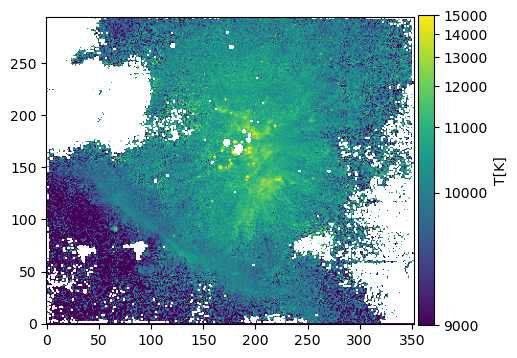

In [310]:
norm = ImageNormalize(vmin = 9000, vmax = 15000,stretch=stretch(), clip=False)
plt.figure(figsize=(5,5))
plt.imshow(tem_ns, cmap='viridis', norm = norm)  # 'viridis' is just one of the available colormaps
plt.colorbar(pad=0.01, fraction=0.04, label='T[K]')  # Add a colorbar to the plot for reference
#plt.title('Temperature from [NII]')
plt.gca().invert_yaxis()
plt.show()

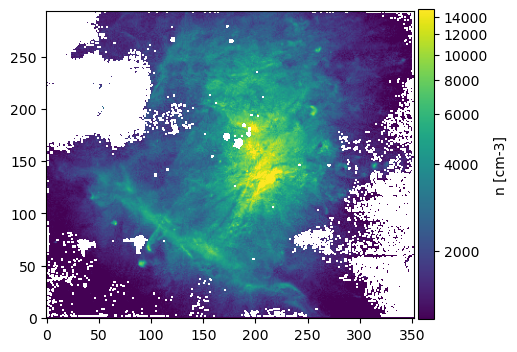

In [312]:
norm = ImageNormalize(vmin = 1000, vmax = 15000,stretch=stretch(), clip=False)

plt.figure(figsize=(5,5))
plt.imshow(den_ns, cmap='viridis', norm = norm)  # 'viridis' is just one of the available colormaps
plt.colorbar(pad=0.01, fraction=0.04, label='n [cm-3]')  # Add a colorbar to the plot for reference
#plt.title('Density from [SII] in cm-3')
plt.gca().invert_yaxis()
plt.show()

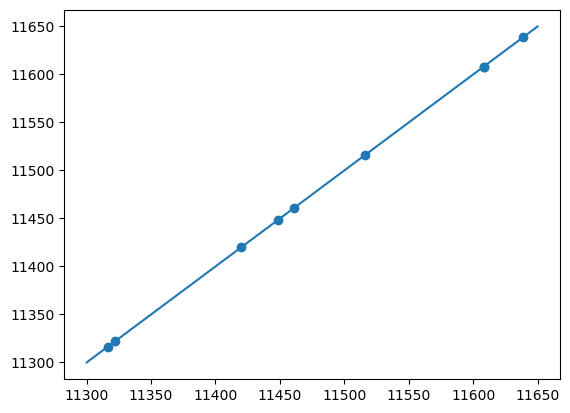

In [69]:
plt.scatter(tem_ss[100:103,100:103].flatten(), tem_ss_old[100:103,100:103].flatten())
x = np.linspace(11300, 11650, 3)
y = x 
plt.plot(x,y)

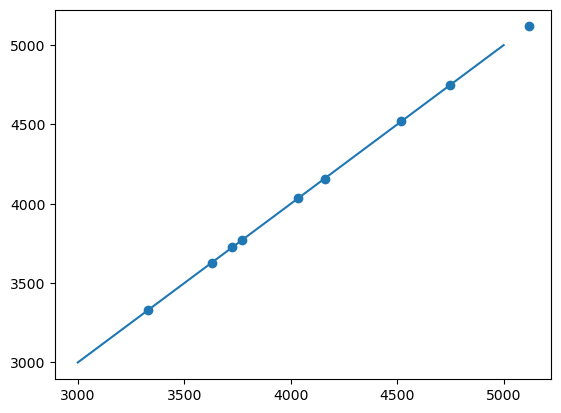

In [71]:
plt.scatter(den_ss[100:103,100:103].flatten(), den_ss_old[100:103,100:103].flatten())
x = np.linspace(3000, 5000, 3)
y = x 
plt.plot(x,y)

(6000.0, 15000.0)

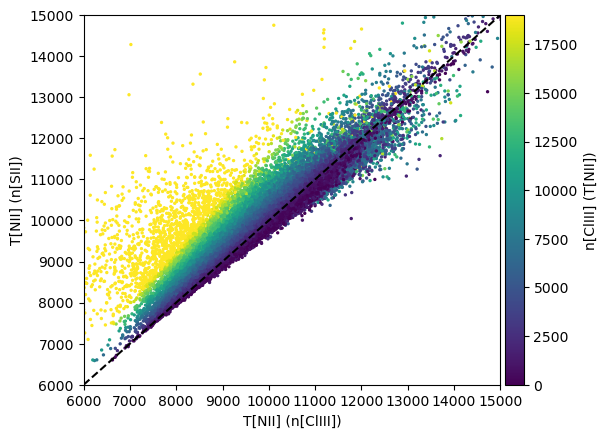

In [313]:
sc = plt.scatter(tem_nc, tem_ns, c = den_nc, s=2)

vmin = 0  # replace with your actual minimum value
vmax = 19000  # replace with your actual maximum value
sc.set_clim(vmin, vmax)
cbar = plt.colorbar(sc, norm = mcolors.LogNorm(), label='n[ClIII] (T[NII])', pad=0.01)
plt.plot(np.linspace(6000, 15000, 10),np.linspace(6000, 15000, 10), color ='black', linestyle='dashed')


plt.xlabel('T[NII] (n[ClIII])')
plt.ylabel('T[NII] (n[SII])')
plt.xlim(6000, 15000)
plt.ylim(6000, 15000)

(6000.0, 15000.0)

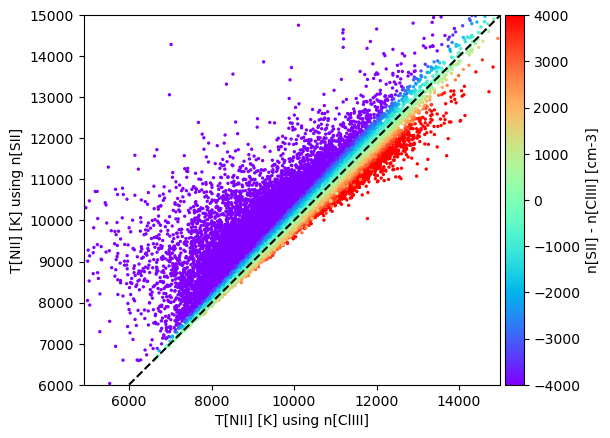

In [386]:
sc = plt.scatter(tem_nc, tem_ns, c = den_ns - den_nc, s=2, cmap='rainbow')

vmin = -4000  # replace with your actual minimum value
vmax = 4000  # replace with your actual maximum value
sc.set_clim(vmin, vmax)
cbar = plt.colorbar(sc, norm = mcolors.LogNorm(), label='n[SII] - n[ClIII] [cm-3]', pad = 0.01)
plt.plot(np.linspace(6000, 15000, 10),np.linspace(6000, 15000, 10), color ='black', linestyle='dashed')

plt.xlabel('T[NII] [K] using n[ClIII]')
plt.ylabel('T[NII] [K] using n[SII]')
plt.xlim(4900, 15000)
plt.ylim(6000, 15000)

(9200.0, 13000.0)

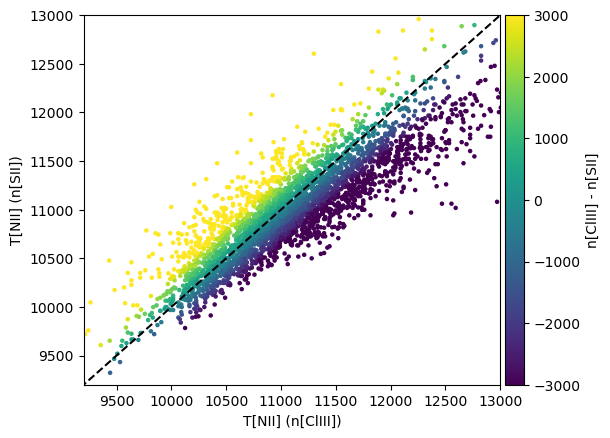

In [322]:
sc = plt.scatter(tem_nc[95:150,180:240], tem_ns[95:150,180:240], c = den_nc[95:150,180:240] - den_ns[95:150,180:240], s=5)

vmin = -3000  # replace with your actual minimum value
vmax = 3000  # replace with your actual maximum value
sc.set_clim(vmin, vmax)
cbar = plt.colorbar(sc, norm = mcolors.LogNorm(), label='n[ClIII] - n[SII]', pad=0.01)
plt.plot(np.linspace(6000, 15000, 10),np.linspace(6000, 15000, 10), color ='black', linestyle='dashed')

plt.xlabel('T[NII] (n[ClIII])')
plt.ylabel('T[NII] (n[SII])')
plt.xlim(9200, 13000)
plt.ylim(9200, 13000)

In [ ]:
plt.axhline(95)
plt.axhline(150)
plt.axvline(180)
plt.axvline(240)

In [ ]:
label = ['Halpha', 'Hbeta','[NII]', '[NII]', '[SII]', '[SII]', '[ClIII]', '[ClIII]', '[SIII]', '[SIII]']   
line_list = [6562.8, 4861.32, 5754.64, 6548.04, 6730.82, 6716.44,  5517.71,5537.88,  6312.06, 9068.60]  


In [113]:
print(den_nc[100,100])

5316.355404320592


## Abudances

In [125]:
N2 = pn.Atom('N',2) #create O++ ion model

#fit NII line for oxygen ion abundance from line at 5007, using tem and den of each pixel 
        
    
n=1
m=294
q=1
r=352


abund_N2_ns_map = np.ma.masked_array(np.empty((295, 353)), mask = True)
abund_N2_nc_map = np.ma.masked_array(np.empty((295, 353)), mask = True)

for i in range(n,m):
    for j in range(q,r):
        flux = intensity_map[3, i, j]
        abund_N2_ns = N2.getIonAbundance(int_ratio=flux, tem=tem_ns[i,j], den=den_ns[i,j], wave=6548)
        abund_N2_nc = N2.getIonAbundance(int_ratio=flux, tem=tem_nc[i,j], den=den_nc[i,j], wave=6548)
        
        abund_N2_ns_map[i,j] = abund_N2_ns
        abund_N2_nc_map[i,j] = abund_N2_nc

pickle.dump(abund_N2_ns_map, open('abund_N2_ns_map.pkl', 'wb'))
pickle.dump(abund_N2_nc_map, open('abund_N2_nc_map.pkl', 'wb'))

In [136]:
abund_N2_ns_map[102,102]

6.711316780351905e-06

In [124]:
print(abund_N2_ns_map[100,100])
print(abund_N2_nc_map[100,100])

8.971956864811421e-06
9.155373614373596e-06


In [127]:
abund_N2 = 12 + np.log10(abund_N2_ns_map)
print(abund_N2[100,100])

6.952887176923925


In [132]:
abund_N2_ns_abs[100:100]

masked_array(
  data=[],
  mask=[],
  fill_value=1e+20,
  dtype=float64)

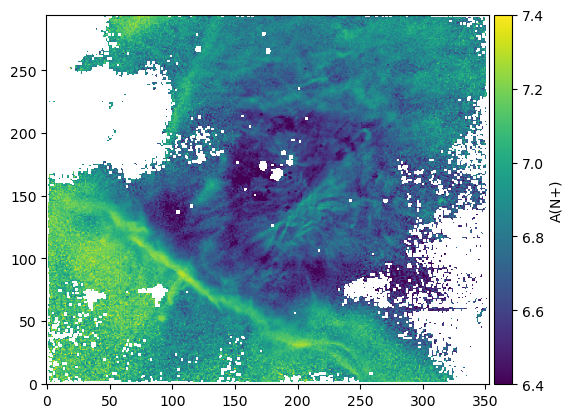

In [324]:
abund_N2_ns_abs = 12 + np.log10(abund_N2_ns_map)
abund_N2_nc_abs = 12 + np.log10(abund_N2_nc_map)


### stretch = viz.AsinhStretch
norm = ImageNormalize(vmin = 6.4, vmax = 7.4,clip=False)

plt.imshow(abund_N2_ns_abs, cmap='viridis', norm = norm)# 'viridis' is just one of the available colormaps
plt.colorbar(pad=0.01, fraction=0.04, label='A(N+)') 
plt.gca().invert_yaxis()
plt.show()

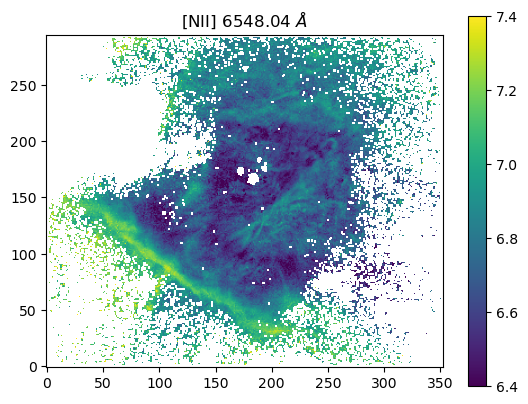

In [140]:
### stretch = viz.AsinhStretch
norm = ImageNormalize(vmin = 6.4, vmax = 7.4,clip=False)

plt.imshow(abund_N2_nc_abs, cmap='viridis', norm = norm)# 'viridis' is just one of the available colormaps
plt.colorbar()  # Add a colorbar to the plot for reference
plt.title(f'{label[3]} {line_list[3]} $\AA$')
plt.gca().invert_yaxis()
plt.show()

(5.5, 7.8)

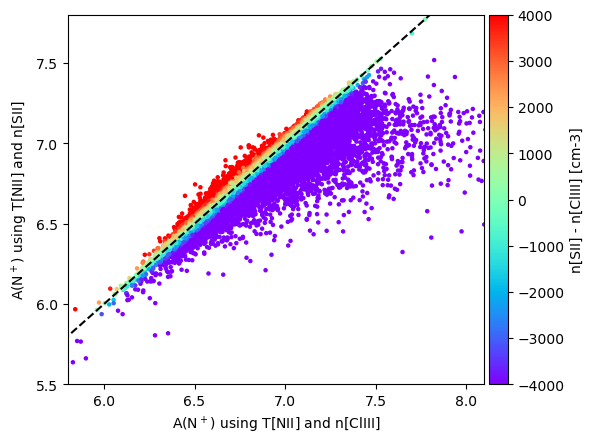

In [387]:
sc = plt.scatter(abund_N2_nc_abs, abund_N2_ns_abs, c = den_ns - den_nc, s=5, cmap='rainbow')

vmin = -4000  # replace with your actual minimum value
vmax = 4000  # replace with your actual maximum value

cbar = plt.colorbar(sc, norm = mcolors.LogNorm(vmin=-3000, vmax=3000), label='n[SII] - n[ClIII] [cm-3]', pad=0.01 )
plt.plot(np.linspace(5.5, 8, 3),np.linspace(5.5, 8, 3), color ='black', linestyle='dashed')

sc.set_clim(vmin, vmax)

plt.xlabel('A(N$^+$) using T[NII] and n[ClIII]')
plt.ylabel(f'A(N$^+$) using T[NII] and n[SII]')
plt.xlim(5.8, 8.1)
plt.ylim(5.5, 7.8)

(5.5, 7.8)

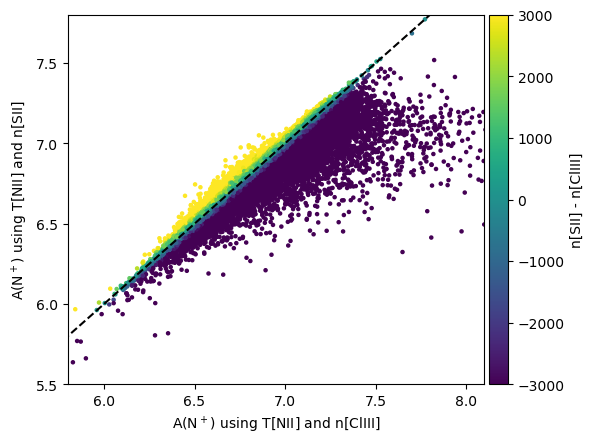

In [344]:
sc = plt.scatter(abund_N2_nc_abs, abund_N2_ns_abs, c = den_ns - den_nc, s=5)

vmin = -3000  # replace with your actual minimum value
vmax = 3000  # replace with your actual maximum value

cbar = plt.colorbar(sc, norm = mcolors.LogNorm(vmin=-3000, vmax=3000), label='n[SII] - n[ClIII]', pad=0.01)
plt.plot(np.linspace(5.5, 8, 3),np.linspace(5.5, 8, 3), color ='black', linestyle='dashed')

sc.set_clim(vmin, vmax)

plt.xlabel('A(N$^+$) using T[NII] and n[ClIII]')
plt.ylabel(f'A(N$^+$) using T[NII] and n[SII]')
plt.xlim(5.8, 8.1)
plt.ylim(5.5, 7.8)

(5.8, 7.9)

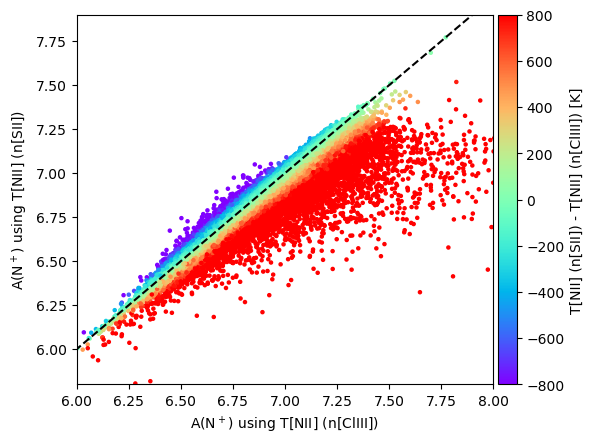

In [379]:
sc = plt.scatter(abund_N2_nc_abs, abund_N2_ns_abs, c = tem_ns - tem_nc, s=5, cmap='rainbow')

vmin = -800 # replace with your actual minimum value
vmax = 800  # replace with your actual maximum value

cbar = plt.colorbar(sc, norm = mcolors.LogNorm(), label='n[SII]) - n[ClIII] [cm-3]', pad=0.01)
plt.plot(np.linspace(5.5, 8, 3),np.linspace(5.5, 8, 3), color ='black', linestyle='dashed')

sc.set_clim(vmin, vmax)

plt.xlabel('A(N$^+$) using T[NII] (n[ClIII])')
plt.ylabel('A(N$^+$) using T[NII] (n[SII])')
plt.xlim(6, 8)
plt.ylim(5.8, 7.9)

In [383]:
10**0.2

1.5848931924611136

(6.2, 7.2)

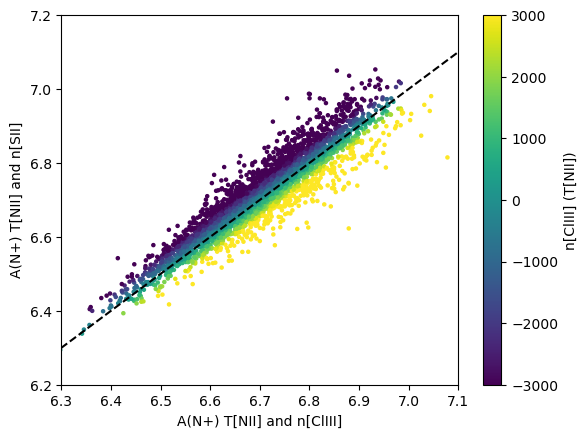

In [230]:
sc = plt.scatter(abund_N2_nc_abs[95:150,180:240], abund_N2_ns_abs[95:150,180:240], c = den_nc[95:150,180:240] - den_ns[95:150,180:240], s=5)

vmin = -3000  # replace with your actual minimum value
vmax = 3000  # replace with your actual maximum value
sc.set_clim(vmin, vmax)
cbar = plt.colorbar(sc, norm = mcolors.LogNorm(), label='n[ClIII] - n[SII](T[NII])')
plt.plot(np.linspace(5.5, 8, 3),np.linspace(5.5, 8, 3), color ='black', linestyle='dashed')

plt.xlabel('A(N+) T[NII] and n[ClIII]')
plt.ylabel('A(N+) T[NII] and n[SII]')
plt.xlim(6.3, 7.1)
plt.ylim(6.2, 7.2)

In [1]:
sc = plt.scatter(abund_N2_nc_abs[95:150,180:240], abund_N2_ns_abs[95:150,180:240], c = den_nc[95:150,180:240] - den_ns[95:150,180:240], s=5)

vmin = -3000  # replace with your actual minimum value
vmax = 3000  # replace with your actual maximum value
sc.set_clim(vmin, vmax)
cbar = plt.colorbar(sc, norm = mcolors.LogNorm(), label='n[ClIII] - n[SII](T[NII])')
plt.plot(np.linspace(5.5, 8, 3),np.linspace(5.5, 8, 3), color ='black', linestyle='dashed')

plt.xlabel('A(N+) T[NII] and n[ClIII]')
plt.ylabel('A(N+) T[NII] and n[SII]')
plt.xlim(6.3, 7.1)
plt.ylim(6.2, 7.2)

NameError: name 'plt' is not defined